In [1]:
import numpy as np

In [8]:
import os

In [3]:
os.chdir('D:/')

In [4]:
m2=np.load('bpr+ours.npy')

In [5]:
m2.shape

(6379, 1434)

In [5]:
os.getcwd()

'D:\\'

In [2]:
import random
import numpy as np
import pandas as pd

In [11]:
node_type_file_path = "node_type_ID (2).txt"

In [12]:
node_type_index = {}  # ID: type
users = []
pois = []

with open(node_type_file_path) as f:
    lines = f.readlines()
    for line in lines:
        line_content = line.strip().split("\t")
        node = line_content[0]
        node_type = line_content[1]
        node_type_index[node] = node_type

        if node_type == "P":
            pois.append(node)
        elif node_type == "U":
            users.append(node)

In [13]:
os.chdir('D:/')

In [14]:
user_map = {node_id: i for i, node_id in enumerate(users)}
poi_map = {node_id: i for i, node_id in enumerate(pois)}
test = pd.read_json("review_test (2).json", orient="split")[["user_id", "business_id"]]
test_mapped = {
    user_i: set(
        poi_map[business_id]
        for business_id in test[test["user_id"] == user_id]["business_id"].unique()
        if business_id in poi_map
    )
    for user_id, user_i in user_map.items()
}
test_mapped_list = list(test_mapped.values())
test_mapped_count = [len(i) for i in test_mapped_list]

In [15]:
test

,user_id,business_id
0,o72LSEPHKu1oQcpXeIVlag,qdpdUjdkEUpzYDdce2yZng_POI
1,KLS_AWthM9n6KLcBTCF_RQ,SZU9c8V2GuREDN5KgyHFJw_POI
2,YLtStLD6NVX8dgfWCY7FlA,Wy8Hswf2cLQGRZN6armkag_POI
3,QwIoijOXtXwvqkjniQPb1Q,-ujBP1Dw0j1-Ffaz97-LXQ_POI
4,i3tYR78tEIcAzeynP7Bu0A,-kY_HDP7IMvGl-kBIZVU4A_POI
...,...,...
25533,y783d3C4Yjm_cGqHvPQnmA,2xxkaRy7rP5EUyjFt2J5kA_POI
25534,SSlW0LTQwER5obHjTW0ZIg,3tvi-OJ_-iK1ecjzSaH-oA_POI
25535,XIkX0MgnhndkqVNQGOK4ig,KSYONgGtrK0nKXfroB-bwg_POI
25536,ik0UUieUX38rPg24heeVgw,6aUb_f9C7a2oOxaIfRGSdA_POI


In [11]:
os.getcwd()

'D:\\'

In [12]:
test

,user_id,business_id
0,o72LSEPHKu1oQcpXeIVlag,qdpdUjdkEUpzYDdce2yZng_POI
1,KLS_AWthM9n6KLcBTCF_RQ,SZU9c8V2GuREDN5KgyHFJw_POI
2,YLtStLD6NVX8dgfWCY7FlA,Wy8Hswf2cLQGRZN6armkag_POI
3,QwIoijOXtXwvqkjniQPb1Q,-ujBP1Dw0j1-Ffaz97-LXQ_POI
4,i3tYR78tEIcAzeynP7Bu0A,-kY_HDP7IMvGl-kBIZVU4A_POI
...,...,...
25533,y783d3C4Yjm_cGqHvPQnmA,2xxkaRy7rP5EUyjFt2J5kA_POI
25534,SSlW0LTQwER5obHjTW0ZIg,3tvi-OJ_-iK1ecjzSaH-oA_POI
25535,XIkX0MgnhndkqVNQGOK4ig,KSYONgGtrK0nKXfroB-bwg_POI
25536,ik0UUieUX38rPg24heeVgw,6aUb_f9C7a2oOxaIfRGSdA_POI


In [13]:
len(test_mapped_list)

6379

In [14]:
m2

array([[ 0.90765676,  1.46117181,  0.98375796, ..., -0.78185548,
        -1.20976993, -0.92695844],
       [ 0.91540605,  1.01937956,  0.89633566, ..., -1.00066328,
        -0.94941681, -1.11711039],
       [ 1.21222806,  1.09489995,  1.19426638, ..., -0.79501501,
        -0.63630256, -0.75142805],
       ...,
       [ 0.36962944,  0.05762696, -0.35906565, ..., -0.96173728,
        -1.27052104, -4.15210092],
       [ 0.43726963, -1.26315421, -0.33230877, ..., -2.0193637 ,
        -0.03867668, -1.24096364],
       [ 0.16139781, -0.40204442, -0.32057238, ..., -1.3064115 ,
        -3.32309628, -0.03783417]])

In [15]:
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [16]:
def find_nearest(lat, long):
    distances = hotels.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return hotels.loc[distances.idxmin(), 'name']

In [3]:
import json
f = open('review_train.json')
data = json.load(f)
df2 = pd.DataFrame(data['data'],columns =data['columns'])

In [18]:
import pandas as pd
business=pd.read_csv('new_business (3).csv')

In [4]:
df2

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,compliment_count,count
0,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw_POI,4.0,0.0,0.0,0.0,"Yes, this is the only sushi place in town. How...",1.378266e+12,NaN,None
1,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA_POI,5.0,0.0,0.0,0.0,"Great burgers,fries and salad! Burgers have a...",1.483327e+12,NaN,None
2,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag_POI,1.0,1.0,0.0,0.0,"If I could give it a zero, I would. I order a ...",1.314227e+12,NaN,None
3,byblHsbxiqb1pC1cuSfslA,C_2mNjl-doRVvsL03_T57Q,18eWJFJbXyR9j_5xfcRLYA_POI,4.0,7.0,0.0,0.0,This is the first time I tried this place and ...,1.319773e+12,NaN,None
4,SpmKsFnwg35PTgCVujOOJA,RiQWbgwR-asiU_mA7s8gpg,pUVRCYL8rT4I5Ry5FYkRsA_POI,5.0,2.0,0.0,1.0,Sweet spot in the Waterline. Came for some liv...,1.482188e+12,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
61686,None,8YsUWA4gkTbja323XoRXUg,YgbIbmfDlB-bZSsjuIfKwA_POI,NaN,NaN,NaN,NaN,Love the breakfast sandwiches. Feel they are o...,1.559182e+09,0.0,None
61687,None,SGwt_hJqKn46rOSr6VjBpA,PZIVcSuN-G_I6oG6EVKntQ_POI,NaN,NaN,NaN,NaN,squid ink pasta is a delicacy; this dish is a ...,1.358749e+09,0.0,None
61688,None,IFxCdobQsw6Mvwi5PyD6Ow,54oLdsGU9B8HxFTqCCqV-A_POI,NaN,NaN,NaN,NaN,X,1.279761e+09,0.0,None
61689,None,ydIdyGQyO8eZe0yqgs0DfA,vh229jJXjCCdO-b4K-JIIw_POI,NaN,NaN,NaN,NaN,15$ tasting Whoaaa,1.410655e+09,0.0,None


In [19]:
len(set(business['business_id']))

1434

In [20]:
business=business[business['business_id'].isin(list(poi_map.keys()))]

In [21]:
business=business.set_index('business_id')

In [22]:
mapping=np.zeros((1434,1434))

In [23]:
m=list(poi_map.keys())

In [24]:
len(m)

1434

In [25]:
saw=set()
for i in range(1434):
    for j in range(1434):
        if (i,j) not in saw:
            busi_id1=m[i]
            busi_id2=m[j]
            mapping[i,j]=dist(business.loc[busi_id1,'latitude'],business.loc[busi_id1,'longitude'],business.loc[busi_id2,'latitude'],business.loc[busi_id2,'longitude'])
            mapping[j,i]=mapping[i,j]
            saw.add((i,j))
            saw.add((j,i))

In [26]:
sorteded=mapping.argsort(axis=1)

In [27]:
res=np.fliplr(m2.argsort(axis=1))

In [28]:
sorteded[:,:40]

array([[   0,  593,  794, ...,   48,  867,  122],
       [   1, 1388,  310, ..., 1212, 1432, 1118],
       [   2, 1026,  915, ...,  127, 1122, 1176],
       ...,
       [1431,  168, 1270, ...,  117, 1148,  146],
       [1432, 1212,  397, ..., 1371,  554,  484],
       [1433, 1121,  773, ...,  252, 1028,  665]], dtype=int64)

In [46]:
def recall_at_20(test_mapped_list,m2,sorteded,n):
    count=0
    hit=0
    for i in range(len(test_mapped_list)):
             # get the number of 
        if len(test_mapped_list[i]) !=0:
            count=count+len(test_mapped_list[i])
            for key in test_mapped_list[i]:
                sorteded_array=sorteded[key,:n][np.fliplr(m2[i,sorteded[key,:n]].reshape(n,1).argsort(axis=0).reshape(1,n))]
                sorteded_array=sorteded_array[:,:20]
                if key in sorteded_array:
                    hit=hit+1
    return hit/count

In [38]:
recall_at_20(test_mapped_list,m2,sorteded,50)

0.8482098841762499


In [43]:
def return_performance(file_name):
    m2=np.load(file_name)
    res=[]
    for num in [50,100,200,500,1000]:
        res.append(recall_at_20(test_mapped_list,m2,sorteded,num))
    return res

In [49]:
bpr_ours=return_performance('bpr+ours.npy')

In [50]:
bpr=return_performance('bpr.npy')

In [51]:
nmf_ours=return_performance('nmf+ours.npy')

In [52]:
nmf=return_performance('nmf.npy')

In [53]:
globalavg=return_performance('globalavg.npy')

In [54]:
svd=return_performance('svd.npy')

In [55]:
mf=return_performance('mf.npy')

In [57]:
ours=return_performance('a-pred.npy')

In [119]:
new_df=pd.DataFrame()

In [120]:
new_df['BPR_Ours']=bpr_ours
new_df['SVD']=svd
new_df['MF']=mf
new_df['Ours']=ours

In [121]:
new_df

,BPR_Ours,SVD,MF,Ours
0,0.628210,0.384733,0.384032,0.478216
1,0.437163,0.169366,0.168254,0.257656
2,0.274350,0.081695,0.075430,0.139937
3,0.138535,0.032233,0.025720,0.067681
4,0.086064,0.015581,0.012283,0.040435


In [122]:
new_df=new_df.rename(index={0:'n=50'})
new_df=new_df.rename(index={1:'n=100'})
new_df=new_df.rename(index={2:'n=200'})
new_df=new_df.rename(index={3:'n=500'})
new_df=new_df.rename(index={4:'n=1000'})

In [123]:
new_df

,BPR_Ours,SVD,MF,Ours
n=50,0.628210,0.384733,0.384032,0.478216
n=100,0.437163,0.169366,0.168254,0.257656
n=200,0.274350,0.081695,0.075430,0.139937
n=500,0.138535,0.032233,0.025720,0.067681
n=1000,0.086064,0.015581,0.012283,0.040435


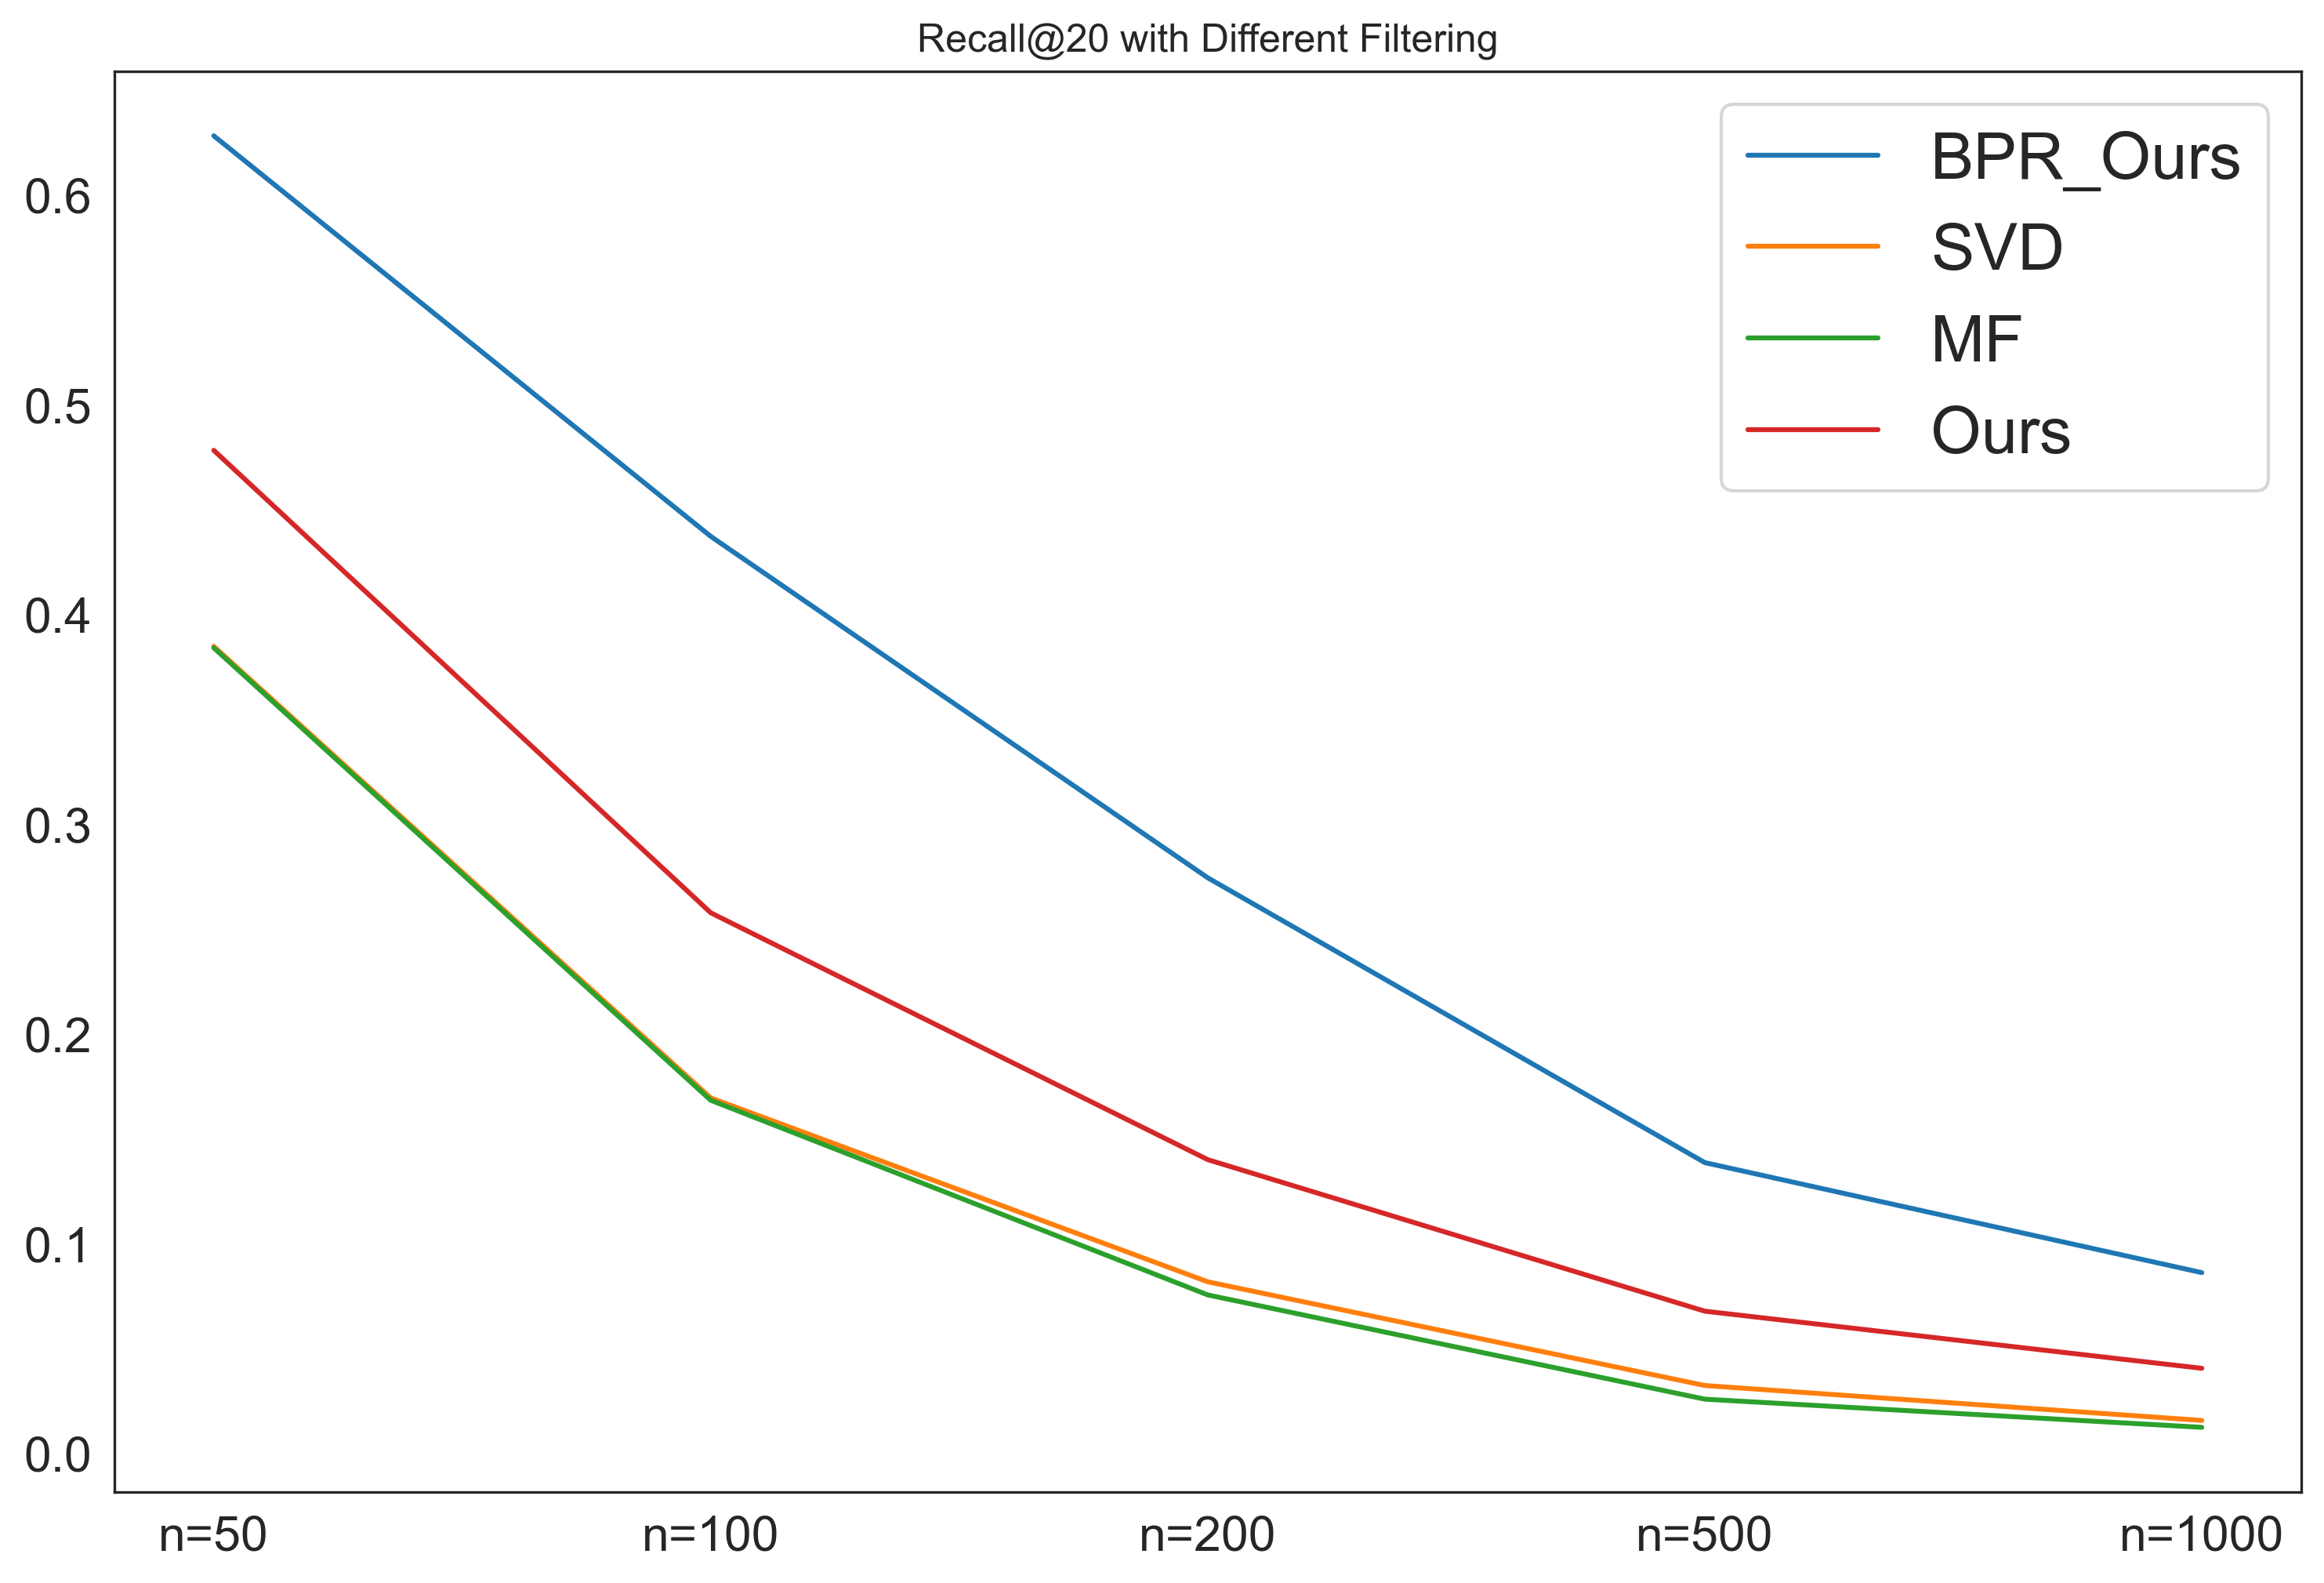

In [124]:
plt.rcParams["figure.dpi"] = 300
seaborn.set_style("white")
new_df.plot(figsize=(12,8))
plt.legend( prop={'size': 20})
plt.tick_params(bottom = False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Recall@20 with Different Filtering');
plt.savefig('lines.png')
